In [22]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [23]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langchain_openai import ChatOpenAI

In [24]:
model = ChatOpenAI()
model .invoke("Prompt chaning in the Langgraph?")

AIMessage(content='Change in the Langgraph has been a continuous process since its inception. Over time, new features have been added, existing features have been improved, and the overall user experience has been refined. Some notable changes in the Langgraph include:\n\n1. Addition of new languages: The Langgraph has continuously expanded its language offerings to include more languages from around the world, allowing users to learn and practice a wider range of languages.\n\n2. Improvements in language learning tools: The Langgraph has introduced new tools and resources to aid language learners in their studies, such as interactive exercises, flashcards, and pronunciation guides.\n\n3. User interface updates: The Langgraph has undergone several redesigns to improve usability and make it easier for users to navigate the platform and access resources.\n\n4. Community features: The Langgraph has added features that encourage interaction and collaboration among users, such as language e

In [25]:
class BlogState(TypedDict):
    title : str 
    outline : str 
    content : str
    

In [26]:
def create_outline(state:BlogState):
    #fetch the title
    title = state["title"]

    #Call the LLM Outline
    prompt = f'Generate a Detailed Outline for a Blog on the topic-{title}'
    outline = model.invoke(prompt).content
    
    #Update the State 
    state['outline'] = outline
    
    return state

In [27]:
def create_blog(state:BlogState):
    title = state['title']
    outline = state['outline']

    prompt = f'write a deatiled blog on the title-{title} using the following outline\n{outline}'
    content = model.invoke(prompt).content
    #update in the State
    state['content'] = content

    return state

In [28]:
graph = StateGraph(BlogState)
#Add the Nodes
graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)

#Edges
graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog',END)

#Compile
workflow = graph.compile()

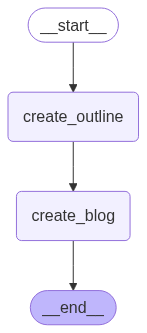

In [29]:
from IPython.display import Image, display

try:
    display(Image(workflow.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [30]:
### Exceute the graph
input_state =  workflow.invoke({'title':"Rise of AI in Software?"})
input_state 

{'title': 'Rise of AI in Software?',
 'outline': 'I. Introduction\n    A. Explanation of AI in software\n    B. Importance of AI in software development\n    C. Overview of how AI is impacting the software industry\n\nII. Evolution of AI in Software\n    A. Early developments in AI technology\n    B. Rise of machine learning and deep learning algorithms\n    C. Integration of AI into software development processes\n\nIII. Applications of AI in Software\n    A. Automation of repetitive tasks\n    B. Personalization of user experiences\n    C. Predictive analytics and decision-making\n    D. Improving software security and reliability\n\nIV. Challenges and Ethical Considerations\n    A. Potential job displacement due to automation\n    B. Bias and fairness in AI algorithms\n    C. Data privacy and security concerns\n    D. Transparency and accountability in AI systems\n\nV. Future Trends in AI and Software\n    A. Expansion of AI capabilities in software development\n    B. Increasing ad

In [31]:
print(input_state ['content'])

In today's rapidly evolving technological landscape, the rise of artificial intelligence (AI) in software development is a trend that is impossible to ignore. AI has already begun to revolutionize the software industry, offering new and innovative solutions to complex problems. In this blog, we will explore the impact of AI in software, the evolution of AI technology, applications of AI in software, challenges and ethical considerations, future trends, and the importance of staying informed about AI in software development.

I. Introduction

A. Explanation of AI in software
Artificial intelligence in software refers to the use of algorithms and computer systems to perform tasks that typically require human intelligence. This can include tasks such as learning, reasoning, problem-solving, perception, and language understanding.

B. Importance of AI in software development
AI in software development is crucial for enhancing efficiency, accuracy, and innovation. It can automate repetitive

In [32]:
### Exceute the graph
input_state =  workflow.invoke({'title':"Traditional Machine Learning and Deep Learning Vs Generative and Agentic AI"})
input_state 

{'title': 'Traditional Machine Learning and Deep Learning Vs Generative and Agentic AI',
 'outline': 'Title: Traditional Machine Learning and Deep Learning Vs Generative and Agentic AI\n\nI. Introduction\n    A. Brief overview of AI and its applications\n    B. Explanation of traditional machine learning and deep learning\n    C. Introduction to generative and agentic AI\n    D. Overview of the blog structure\n\nII. Traditional Machine Learning\n    A. Definition and examples of traditional machine learning algorithms\n    B. Advantages and limitations of traditional machine learning\n    C. Real-world applications of traditional machine learning\n    D. Case studies demonstrating the effectiveness of traditional machine learning\n\nIII. Deep Learning\n    A. Definition and examples of deep learning architectures\n    B. Advantages and limitations of deep learning\n    C. Comparison of deep learning with traditional machine learning\n    D. Real-world applications of deep learning\n   

In [33]:
print(input_state ['content'])



I. Introduction

Artificial Intelligence (AI) has revolutionized the way we interact with technology and has transformed various industries such as healthcare, finance, and transportation. Traditional machine learning and deep learning are two popular approaches within the field of AI that have been widely used for tasks such as image recognition, natural language processing, and recommendation systems. However, emerging paradigms like generative and agentic AI are pushing the boundaries of AI capabilities by enabling machines to create new content and interact with their environment in a more human-like manner.

In this blog, we will explore the differences between traditional machine learning and deep learning compared to generative and agentic AI. We will discuss the definitions, advantages, limitations, real-world applications, and provide case studies to highlight the effectiveness of each approach.

II. Traditional Machine Learning

Traditional machine learning algorithms, such

### Adding the Evaluatro Parameter

In [34]:

class BlogState(TypedDict):
    title: str
    outline: str
    content: str
    score: int  # New field for evaluation score (1-10)

    

In [ ]:
def evaluate_content(state: BlogState):
    content = state['content']
    title = state['title']
    
    prompt = f"""Evaluate how relevant this content is to the title '{title}'.
    Content: {content}
    
    Provide a score from 1-10 where:
    1 = Not relevant at all
    5 = Somewhat relevant
    10 = Perfectly relevant
    
    Return ONLY the number score, nothing else."""
    
    score = int(model.invoke(prompt).content)
    state['score'] = score #update the score
    return state


In [36]:
graph = StateGraph(BlogState)

# Add the Nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node('evaluate_content', evaluate_content)  # New node

# Edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', 'evaluate_content')  # New edge
graph.add_edge('evaluate_content', END)

# Compile
workflow = graph.compile()


In [37]:
# Execute and show results with score
result = workflow.invoke({'title': "Rise of AI in Software?"})
print(f"Content Score: {result['score']}/10")
print(result['content'])


Content Score: 10/10
Artificial Intelligence (AI) has been rapidly transforming the way software is developed and utilized in various industries. From automating repetitive tasks to predicting user behavior, AI has become an integral component in modern software development. In this blog, we will explore the rise of AI in software, its evolution, applications, benefits, challenges, future trends, and its potential impact on the future of software development.

I. Introduction
A. Definition of AI in software: AI refers to the simulation of human intelligence processes by machines, primarily computer systems. AI software can perform tasks such as learning, reasoning, problem-solving, perception, language understanding, and decision-making.
B. Brief history of AI in software development: AI has its roots in the 1950s, with the development of early neural networks and expert systems. Over the years, AI has evolved significantly, thanks to advancements in machine learning algorithms, deep l

In [38]:
result = workflow.invoke({'title': "Traditional ML vs Generative AI"})
print(f"Content Score: {result['score']}/10")

Content Score: 9/10


In [39]:
print(result['content'])

Machine learning (ML) and artificial intelligence (AI) have become integral parts of various industries, revolutionizing how businesses operate and how we interact with technology. Within the realm of machine learning, there are two main approaches that have gained significant traction in recent years: traditional ML and generative AI. While both methods aim to make sense of data and make predictions, they differ in their underlying principles and techniques.

Traditional Machine Learning

Traditional machine learning involves the use of algorithms and statistical models to perform specific tasks, such as classification, regression, or clustering. These algorithms learn from historical data to make predictions or decisions without being explicitly programmed to do so. Some common examples of traditional machine learning algorithms include logistic regression, support vector machines, decision trees, and k-nearest neighbors.

One of the strengths of traditional machine learning is its a